In [2]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the Dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [ ]:
#First 20 rows
df.head(20)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [ ]:
#Check types of data
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [ ]:
#Select column that have object data types
colname = []
for x in df.columns:
    if df[x].dtypes==object:
        colname.append(x)

In [ ]:
#Convert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in colname:
    df[x] = le.fit_transform(df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("feature:", x)
    print("mapping:", le_name_mapping)



feature: Fuel_Type
mapping: {'CNG': 0, 'Diesel': 1, 'Petrol': 2}


In [8]:
df.dtypes

Price        int64
Age_08_04    int64
KM           int64
Fuel_Type    int32
HP           int64
Automatic    int64
cc           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object

In [ ]:
#Check null values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

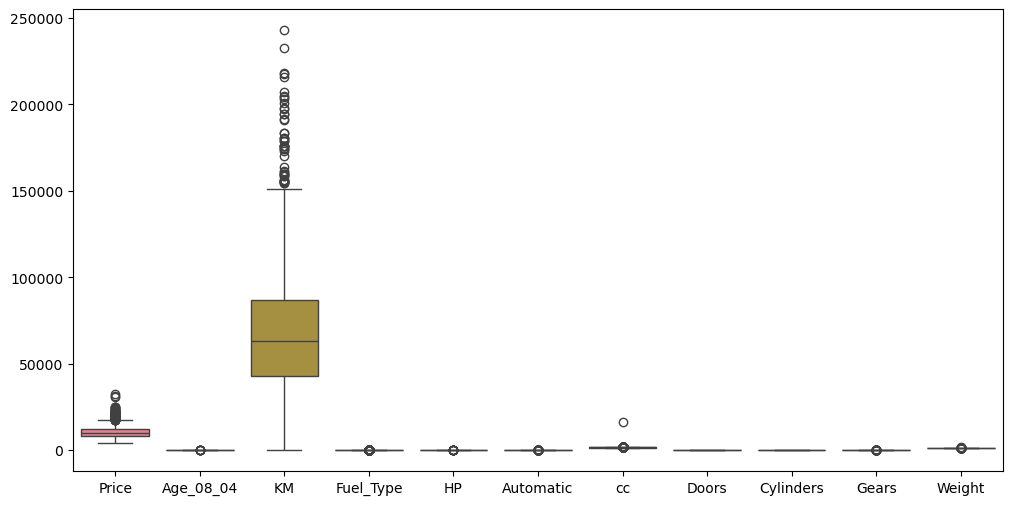

In [ ]:
#Check outliers
numeric_col = df.select_dtypes(include='int')
plt.figure(figsize=(12, 6))
sns.boxplot(data = numeric_col)
plt.show()

In [ ]:
#Remove outliers
mask = pd.Series(True, index=df.index)

for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    LQR = Q3-Q1
    lower = Q1 - 1.5 * LQR
    upper = Q3 + 1.5 * LQR
    mask &= df[col].between(lower, upper)
df_clean = df[mask]

In [12]:
df.shape


(1436, 11)

In [13]:
df_clean.shape

(1059, 11)

In [14]:
df_clean.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
18,16750,24,25563,2,110,0,1600,3,4,5,1065
19,16950,30,64359,2,110,0,1600,3,4,5,1105
20,15950,30,67660,2,110,0,1600,3,4,5,1105
22,15950,28,56349,2,110,0,1600,3,4,5,1120
23,16950,28,32220,2,110,0,1600,3,4,5,1120


In [15]:
x = df_clean[['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']]
y = df_clean[['Price']]

In [ ]:
#train-test split for train or test data seperation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
print(x.shape)
print(y.shape)

(1059, 10)
(1059, 1)


In [ ]:
#Ridge and Lasso for regularization of data 

In [18]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)

[-4137.94806485]
[[-1.10273281e+02 -1.29403759e-02  0.00000000e+00 -9.22523745e+01
   0.00000000e+00  6.69144616e+00 -2.23883219e+01  0.00000000e+00
   0.00000000e+00  1.99400699e+01]]


In [19]:
from sklearn.linear_model import Lasso
lm = Lasso()

lm.fit(x_train, y_train)

print(lm.intercept_)
print(lm.coef_)

[-4073.10653434]
[-1.10241347e+02 -1.29419041e-02  0.00000000e+00 -9.08390195e+01
  0.00000000e+00  6.58612192e+00 -2.04619246e+01  0.00000000e+00
  0.00000000e+00  1.98819179e+01]


c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.490e+07, tolerance: 4.522e+05
  model = cd_fast.enet_coordinate_descent(


In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(847, 10)
(847, 1)
(212, 10)
(212, 1)


In [ ]:
#Create the Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(x_train, y_train)

In [ ]:
#Check Model coefficient
print("Beta 1, 2, 3, 4, 5, 6, 7, 8, 9, 10:", model.coef_)

Beta 1, 2, 3, 4, 5, 6, 7, 8, 9, 10: [[-1.10277845e+02 -1.29403003e-02 -1.36779477e-13 -9.23936989e+01
   5.68434189e-14  6.70215119e+00 -2.24571013e+01  0.00000000e+00
   0.00000000e+00  1.99425085e+01]]


In [ ]:
#Check Model intercept(b value in y = mx + b)
print("Beta 0", model.intercept_)

Beta 0 [-4141.54710595]


In [24]:
df_clean.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
18,16750,24,25563,2,110,0,1600,3,4,5,1065
19,16950,30,64359,2,110,0,1600,3,4,5,1105
20,15950,30,67660,2,110,0,1600,3,4,5,1105
22,15950,28,56349,2,110,0,1600,3,4,5,1120
23,16950,28,32220,2,110,0,1600,3,4,5,1120


In [ ]:
#With the help of Equation we predict the price
y = -6678.50613677 + (-1.10507842 * 24) + (-1.16475889 * 25563) + (1.24344979 * 2) + (-8.18550925 * 110) + 0 + (5.65603071 * 1600) + (-8.70288339 * 3) + 0 + 0 + (2.29710769 * 1065)

In [26]:
print(y)

-25907.71846616


In [ ]:
#Generate prediction on Test data
x_test = x_test.drop(columns=["actual sales", "predicted sales"], errors='ignore')
y_pred = model.predict(x_test)

In [ ]:
#Create column for predicted data
df_new = pd.DataFrame()
df_new = x_test
df_new['actual sales']= y_test
df_new['predicted sales']= y_pred
df_new

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,actual sales,predicted sales
1253,77,77000,2,86,0,1300,3,4,5,1015,6950,7311.868932
673,67,104000,2,86,0,1300,3,4,5,1020,9250,8164.971815
1167,74,96302,2,86,0,1300,3,4,5,1015,6495,7392.928790
267,34,49291,2,110,0,1600,3,4,5,1040,12450,12704.138343
879,62,61930,2,110,0,1600,4,4,5,1035,9950,9330.636585
...,...,...,...,...,...,...,...,...,...,...,...,...
1029,58,30634,2,110,0,1600,5,4,5,1075,10450,10951.970841
1364,74,58454,2,86,0,1300,3,4,5,1015,7500,7882.693277
564,56,37461,2,97,0,1400,3,4,5,1025,9750,9992.659727
1239,77,82103,2,86,0,1300,3,4,5,1015,6950,7245.834579


In [ ]:
#Check Model Performance
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
print('R-squered:', r2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

n = len(y_test)
p = x_test.shape[1]

adjusted_r_squered = 1 - (1-r2)* ((n-1) / (n-p-1))
print("adjusted_r_squered:  ", adjusted_r_squered)



R-squered: 0.8199407853353582
RMSE: 1038.1326092324907
adjusted_r_squered:   0.809082943245028


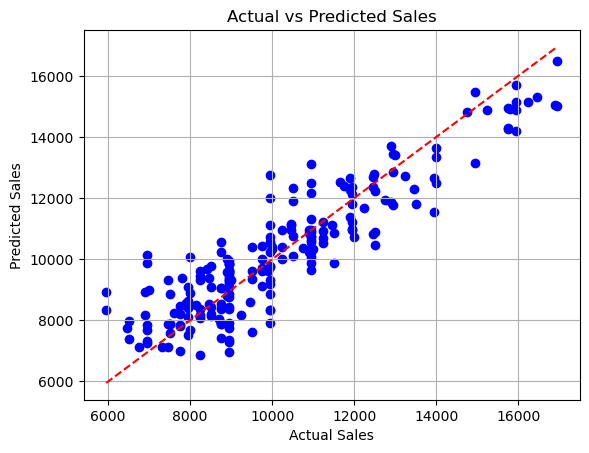

In [ ]:
#Plot Scatterplot for Actual vs Predicted Sales
import matplotlib.pyplot as plt

plt.scatter(df_new['actual sales'], df_new['predicted sales'], color='blue')
plt.plot([df_new['actual sales'].min(), df_new['actual sales'].max()],
         [df_new['actual sales'].min(), df_new['actual sales'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

In [ ]:
#Save Model
import pickle
with open("model.pkl", "wb") as p:
    pickle.dump(model, p)
